In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as c
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
from scipy.optimize import curve_fit
import math
from statistics import stdev 

In [2]:
def bin_it(yvalues,xvalues,binsize):
    '''puts an array into averaged bins of a given size'''
    N=int(math.ceil(len(yvalues)/binsize))
    C=0
    newy=[]
    while C<N:
        if (C+1)*binsize<len(yvalues):
            Q=(np.sum(yvalues[C*binsize:(C+1)*binsize]))/binsize
        else:
            Q=(np.sum(yvalues[C*binsize:len(yvalues)]))/binsize
        newy.append(Q)
        C+=1
    return np.array(newy),xvalues[0::binsize] 

In [3]:
#Adds random noise
def addnoise(pure):
    vary = np.random.uniform(0, 1, pure.shape)
    signal = -(pure* np.log(vary))
    return (signal)

In [4]:
def gausgran(x,height,centre,width):
    '''plots a gaussian acounting for granulation'''
    best_vals=findgran(frequency,Fulldata)
    granulation =graneq(frequency,best_vals[0],best_vals[1])
    return height*np.exp((-(x-centre)**2)/(2*width**2))+granulation

In [5]:
def count(list1, l, r): 
    # x for x in list1 is same as traversal in the list 
    # the if condition checks for the number of numbers in the range  
    # l to r  
    # the return is stored in a list 
    # whose length is the answer 
    return len(list(x for x in list1 if l <= x <= r)) 

In [6]:
def findgran(frequency,y):
    #guess_vals=[5777,696340000,1.989*10**30,274]
    guess_vals=[np.max(Fulldata),Fulldata[round(len(Fulldata)/4)]]
    best_vals, covar =curve_fit(graneq, frequency, y,p0=guess_vals)
    return best_vals

In [7]:
def graneq(x,A,tau):
    return A/(1+(2*np.pi*x*tau)**4)

In [8]:
def find_vmax(N,binsize, shot_noise_level):
    frequency=np.linspace(1,6000,6000)
    x = np.array(frequency)
    vmag = np.full((len(frequency)), shot_noise_level) #here 8 defines the apparent magnitude
    shot_noise = 18*10**(-0.4*(11.0-vmag))
    #binsize=80
    C=0
    fails=0
    centres=[]
    widths=[]
    amps=[]
    #N=100 #number of trials to find v_max with differnt noise
    while C<N:
        y=addnoise(Fulldata) #adds noise to y values, inside loop so each curve fit will be different due to the random noise
        yb,xb=bin_it(y,x,binsize) #yb and xb as in xbinned and ybinned bins data with a binsize of 50
        guess_vals=[np.max(yb),xb[0]+(xb[-1]-xb[0])/2,(xb[-1]-xb[0])/4] #rough guesses which will change with each plot
        #try and except are used in case a gaussian cant be fitted to the data. try and execpt allow the code to continue even if a
        #fit can not be found. If a fit can be found the v_max is recorded and added to an array of v_max values. If a fit can not
        #be found the failure is recored and the code continues with the next trial
        try: 
            best_vals, covar =curve_fit(gausgran, xb, yb,p0=guess_vals)
            #attempts to fit a gaussian to the data taking acount of the granulation
            centres.append(best_vals[1])
            amps.append(best_vals[0])
            widths.append(best_vals[2])
        except:
            fails+=1 #records failure
            C+=1
            continue
        C+=1
    percentage=fails*100/N
    #print(f'Number of trials {N}')
    #print(f'binsize: {binsize}')
    print(f'shot noise level {shot_noise_level}')
    print(f'{percentage}% trails failed to fit a gaussian') 
    if len(centres)<1: #prevents error is code
        print('Code failed to fit any gaussians ')
    else:   
        average_centres=np.mean(centres)
        difference=np.abs(average_centres-3100)
        print(f'average v_max {average_centres} which is {difference} away from the true value of 3100 ')
        print('')
        return centres

In [9]:
#Using the Gaussian as the height in the function to plot the Lorentzians
def lorentz_gauss(modes, Gauss, width):
    Lorentzh = np.zeros(len(x))
    for p in range(len(modes)):
        Lorentzh+=(Gauss*((1+((x - np.array(modes)[p])/(width/2))**2)**(-1)))
    Lorentzh_array = np.array(Lorentzh)
    return Lorentzh_array

In [16]:
#define parameters
delta_v_sun = 134.8 #microHz
D = 1.5
n=np.linspace(1,40,40)
l= 0
l1 = 1
l2 = 2
l3 = 3
width = 10

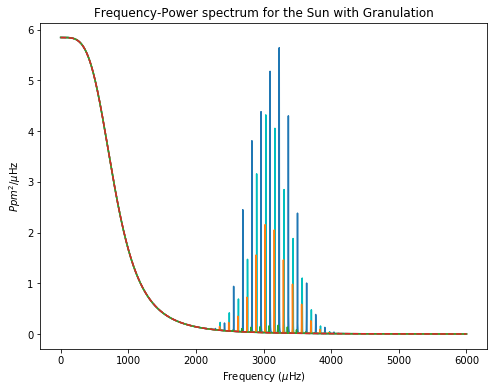

In [20]:
frequency=np.linspace(1,6000,6000)
x = np.array(frequency)
H=5
epsilon=1.5
V_max_sun = 3100 #microHz
A_max_sun = 2.1 #ppm from Warrick's paper


#calculate modes for different angular degree, l and radial mode, n
modes=[]
for i in range(len(n)):
    modes.append(delta_v_sun*(n[i]+((l)/2)+epsilon)-D*(l)*((l)+1))

modes1=[]
for i in range(len(n)):
    modes1.append(delta_v_sun*(n[i]+((l1)/2)+epsilon)-D*(l1)*((l1)+1))
    
modes2=[]
for i in range(len(n)):
    modes2.append(delta_v_sun*(n[i]+((l2)/2)+epsilon)-D*(l2)*((l2)+1))

modes3=[]
for i in range(len(n)):
    modes3.append(delta_v_sun*(n[i]+((l3)/2)+epsilon)-D*(l3)*((l3)+1))

#Defines Gaussian curve with height A squared
sigma = 2.123*delta_v_sun#microHz
Gauss = (A_max_sun**2)*(np.exp(-0.5*((x-V_max_sun)/sigma)**2))


#Defines parameters for granulation
tau_sun = 200 #seconds
g_sun = 274 #metres per second squared
T_eff_sun = 5777 #Kelvin
sigma_sun = 50000/(c.R_sun.value/(1000*10**3)) #ppm

granulation = (4*np.sqrt(2)*tau_sun/1e6*(sigma_sun)**2)/(1+(2*np.pi*x*tau_sun/1e6)**4) #ppm squared per micro hertz
#Defines width of the Lorentzians
alpha = -25.5+29.1 #for the Sun
gamma_alpha = 6.3 - 1.8 #for the Sun
linewidth = (alpha*np.log(x/V_max_sun)+np.log(gamma_alpha))


#Heights of modes scaled to their relative visibilities 
Lorentzh_array_0 = lorentz_gauss(modes, Gauss, linewidth)
Lorentzh_array_1 = lorentz_gauss(modes1, Gauss*1.5, linewidth)
Lorentzh_array_2 = lorentz_gauss(modes2, Gauss*0.5, linewidth)
Lorentzh_array_3 = lorentz_gauss(modes3, Gauss*0.04, linewidth)

#Plots the Lorentzians with the granulation as a full spectrum
plt.figure(figsize=(8,6))
plt.plot(x, Lorentzh_array_0+granulation, 'c')
plt.plot(x, Lorentzh_array_1+granulation)
plt.plot(x, Lorentzh_array_2+granulation)
plt.plot(x, Lorentzh_array_3+granulation)
plt.title('Frequency-Power spectrum for the Sun with Granulation')
plt.xlabel('Frequency ($\mu$Hz)')
plt.ylabel('$Ppm^2$/$\mu$Hz')

#Fulldata is the modes and the granulation without noise as this needs to be added in each loop
Fulldata=Lorentzh_array_0+Lorentzh_array_1+Lorentzh_array_2+Lorentzh_array_3+granulation
vmag = np.full((len(frequency)), -11) #here 8 defines the apparent magnitude
shot_noise = 18*10**(-0.4*(11.0-vmag))
best=findgran(frequency,Fulldata+shot_noise)
plt.plot(frequency,graneq(frequency,best[0],best[1]),'--')
plt.show()


100.0% trails failed to fit a gaussian
Code failed to fit any gaussians 
10


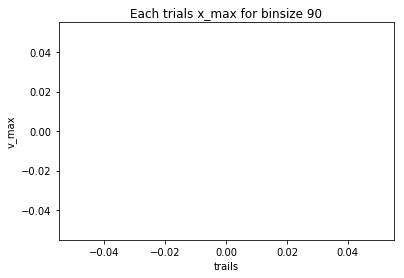

0/0 are outside the expected range


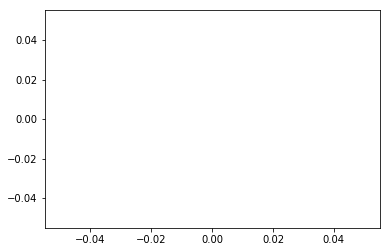

In [21]:
frequency=np.linspace(1,6000,6000)
x = np.array(frequency)
binsize=90
Fulldata=shot_noise+Fulldata
C=0
fails=0
centres=[]
widths=[]
amps=[]
N=10 #number of trials to find v_max with differnt noise, 4000
while C<N:
    y=addnoise(Fulldata) #adds noise to y values, inside loop so each curve fit will be different due to the random noise
    yb,xb=bin_it(y,x,binsize) #yb and xb as in xbinned and ybinned bins data with a binsize of 50
    guess_vals=[np.max(yb),xb[0]+(xb[-1]-xb[0])/2,(xb[-1]-xb[0])/4] #rough guesses which will change with each plot
    #try and except are used in case a gaussian cant be fitted to the data. try and execpt allow the code to continue even if a
    #fit can not be found. If a fit can be found the v_max is recorded and added to an array of v_max values. If a fit can not
    #be found the failure is recored and the code continues with the next trial
    try: 
        best_vals, covar =curve_fit(gausgran, xb, yb,p0=guess_vals)
        #attempts to fit a gaussian to the data taking acount of the granulation
        centres.append(best_vals[1])
        amps.append(best_vals[0])
        widths.append(best_vals[2])
    except:
        fails+=1 #records failure
        C+=1
        continue
    C+=1
    if C % (25*(N/100)) == 0:
        print(f'Code is {C/(N/100)}% complete') #if statment that allows tracking of code completion while it is running
percentage=fails*100/N
print(f'{percentage}% trails failed to fit a gaussian') 
if len(centres)<1: #prevents error is code
    print('Code failed to fit any gaussians ')
    print(fails)
else:   
    average_centres=np.mean(centres)
    difference=np.abs(average_centres-3100)
    print('')
    print(f'average v_max {average_centres} which is {difference} away from the true value of 3100 ')
    x_vals=bin_it(addnoise(Fulldata),x,50)[1]
    y_vals=bin_it(addnoise(Fulldata),x,50)[0]
    plt.plot(x_vals,y_vals, label='example data')
    plt.plot(x_vals,gausgran(x_vals,np.mean(amps),np.mean(centres),np.mean(widths)), 
             label='fitted gaussian including granulation')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.title('fitted gaussain ')
    plt.legend()
    plt.show()
    quater=int(len(x_vals)/4)
    plt.plot(x_vals[quater:3*quater],y_vals[quater:3*quater], label='example data')
    plt.plot(x_vals[quater:3*quater],gausgran(x_vals[quater:3*quater],np.mean(amps),np.mean(centres),np.mean(widths)),
            label='fitted gaussian including granulation')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.title('fitted gaussain cropped down')
    plt.legend()
    plt.show()
xs=np.linspace(1,N,N-fails)
plt.plot(xs,centres)
plt.xlabel('trails')
plt.ylabel('v_max')
plt.title(f'Each trials x_max for binsize {binsize}')
plt.show()
plt.scatter(xs,centres)
values_outside_expected_range=count(centres, 1000, 2500)
No_vals=len(centres)
print(f'{values_outside_expected_range}/{No_vals} are outside the expected range')

In [13]:
#loop of 4000 seems to be a good amount, its large enough to get a good value, but small enough to not run for a long time
#binsize of 90 seems to best
v_maxs=[]
error=[]
Ns=np.linspace(10,4000,10)
binsizes=np.linspace(50,150,20)
#for n in binsizes:
#    v_maxs.append(find_vmax(4000,int(n)))
#plt.plot(binsizes,v_maxs)
#plt.scatter(binsizes,v_maxs)
#plt.axhline(3100,color='r')
#plt.show()
shot_noise_levels=[1,2,3,4,5,6]
for n in shot_noise_levels:
    Q=find_vmax(4000,90,n)
    v_maxs.append(np.mean(Q))
    error.append(stdev(Q))
plt.plot(shot_noise_levels,v_maxs)
plt.scatter(shot_noise_levels,v_maxs)
plt.axhline(3100,color='r')
plt.xlabel('shot_noise_levels')
plt.ylabel('v_max')
plt.show()
plt.plot(shot_noise_levels, error)
plt.xlabel('shot_noise_levels')
plt.ylabel('standard deviation of values')
plt.show()
print(error)

C:\Users\Edward\Documents\code\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


shot noise level 1
100.0% trails failed to fit a gaussian
Code failed to fit any gaussians 


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

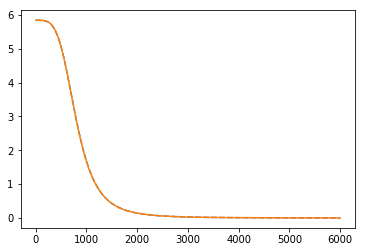

[ 5.84171516e+00 -1.99778024e-04]


In [22]:
frequency=np.linspace(1,6000,6000)
best_vals=findgran(frequency,Fulldata)
plt.plot(frequency,graneq(frequency,best_vals[0],best_vals[1]),'--')
plt.plot(frequency,granulation,)
#plt.plot(frequency,Fulldata)
plt.show()
print(best_vals)


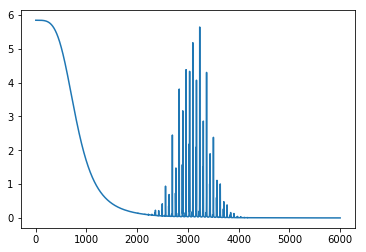

In [23]:
plt.plot(frequency,Fulldata)
plt.show()
Fulldata=addnoise(Fulldata)
